<h3> Data: </h3>
<p> The dataset provided by an algerian company includes variables about adress of depart, adress of arrival, distance, ... 
    The training dataset provided here is a subset of over 60,000 samples. <p>

   



In [111]:
import pandas as pd

df = pd.read_csv('data/vtc_data.csv')
df.head()

,travel_id,travel_type,car_type,driver_id,address_of_departure,arrival_address,lat_and_long_of_arrival_address,date_of_travel,time_of_travel,estimated_time,distance,options,state,price
0,27550488,advance,Mini Citadine,NaN,"AXA Assurances Algérie, Boulevard du 11 Decemb...","Clinique Krim Belkacem, Boulevard Colonel Krim...","36.770681600000003,3.0510609999999998",2019-09-29 23:55:00,23:55:00,13.0,6053.0,NaN,cancelled,0.0
1,28026204,live,Mini Citadine,43166.0,Unnamed Road Dar El Beïda,"136 logements, bloc D، Route de Ouled Fayet Ch...","36.745614799999998,2.9428641",2019-09-29 23:54:36,23:54:00,33.0,31895.0,NaN,finished,133300.0
2,28026119,live,Mini Citadine,30759.0,"Office Riadh El Feth ,bois des arcades ,El Mad...","79 Rue Fabri MARCELLO, Bir Mourad Raïs, 阿尔及利亚","36.736257999999999,3.0616660000000002",2019-09-29 23:54:27,23:54:00,7.0,3056.0,NaN,finished,32600.0
3,28025871,live,Mini Citadine,32536.0,N24 Bordj El Kiffan,"Dar El Beïda, Algeria","36.727856899999999,3.2181302000000001",2019-09-29 23:47:25,23:47:00,7.0,6092.0,NaN,finished,38300.0
4,28026102,live,Mini Citadine,40592.0,"Lily Rose, Hydra, Algeria","214 résidence، Bois des Cars 2, Deli Ibrahim, ...","36.753667999999998,2.9762750000000002",2019-09-29 23:46:35,23:46:00,11.0,6928.0,NaN,finished,47800.0


In [112]:
#get information about integer values
df.describe()

,travel_id,driver_id,estimated_time,distance,price
count,6.533500e+04,60229.000000,65335.000000,65078.000000,6.512100e+04
mean,2.698962e+07,36458.806904,20.731981,12456.091091,4.291896e+04
std,5.911326e+05,5170.877670,21.092258,16331.355123,4.961151e+04
min,1.147333e+07,14770.000000,0.000000,0.000000,-6.800000e+04
25%,2.646277e+07,32376.000000,11.000000,4851.000000,0.000000e+00
50%,2.691974e+07,36638.000000,17.000000,8960.500000,3.820000e+04
75%,2.751333e+07,41457.000000,26.000000,16490.750000,6.080000e+04
max,2.805757e+07,44197.000000,618.000000,575798.000000,2.250000e+06


In [113]:
#get an overall look about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65335 entries, 0 to 65334
Data columns (total 14 columns):
travel_id                          65335 non-null int64
travel_type                        65335 non-null object
car_type                           65335 non-null object
driver_id                          60229 non-null float64
address_of_departure               65335 non-null object
arrival_address                    65292 non-null object
lat_and_long_of_arrival_address    65292 non-null object
date_of_travel                     65335 non-null object
time_of_travel                     65121 non-null object
estimated_time                     65335 non-null float64
distance                           65078 non-null float64
options                            1152 non-null object
state                              65335 non-null object
price                              65121 non-null float64
dtypes: float64(4), int64(1), object(9)
memory usage: 7.0+ MB


In [114]:
#check the duration of the whole data
print("First date : ", df["date_of_travel"].min())
print("Last date : ", df["date_of_travel"].max())

First date :  2019-08-26 18:35:57
Last date :  2019-09-29 23:55:00


In [115]:
#exo: Define our features and target
#solution:
chosen_features = ["travel_type", "car_type", "date_of_travel", "distance"]
target_name = "estimated_time"

In [116]:
features = df[chosen_features]
labels = df[target_name]

In [117]:
# exo: check if there are null values in each column
#solution : 
for col in features.columns :
    print(col,':' ,df[col].isnull().sum())

travel_type : 0
car_type : 0
date_of_travel : 0
distance : 257


In [118]:
# add hour column
def getHour(x):
    return int(x[11: 13])
# create a new column
features["hour"] = features["date_of_travel"].apply(getHour)
# drop the "date of travel" column
features.drop(["date_of_travel"], axis = 1, inplace = True)
features.head()

C:\Users\Younes38\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,travel_type,car_type,distance,hour
0,advance,Mini Citadine,6053.0,23
1,live,Mini Citadine,31895.0,23
2,live,Mini Citadine,3056.0,23
3,live,Mini Citadine,6092.0,23
4,live,Mini Citadine,6928.0,23


In [119]:
#trait null values
features["distance"].fillna(df["distance"].mean(), inplace = True)

In [120]:
#confirm that we don't have null values
for col in features.columns :
    print(col,':' ,features[col].isnull().sum())

travel_type : 0
car_type : 0
distance : 0
hour : 0


In [121]:
#Encode data
def oneHotEncode(df, col):
    dfDummies = pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, dfDummies], axis=1)
    # exo: drop the current column
    # solution : 
    #df.drop([col], axis = 1, inplace = True)
    
    return df

In [ ]:
# complete the oneHotEncode function 

In [122]:
features = oneHotEncode(features, 'travel_type')
features = oneHotEncode(features, 'car_type')
features.head()

,distance,hour,travel_type_Personal,travel_type_advance,travel_type_live,car_type_2H,car_type_4H,car_type_8H,car_type_Berline,car_type_Business,...,car_type_Hors-bord 6 places,car_type_Jet ski 2 places,car_type_Livraison,car_type_Mini Citadine,car_type_Moto,car_type_Taxi,car_type_Thakeraoust,car_type_Yacht 8 places,car_type_tem:tem 4h,car_type_tem:tem 8h
0,6053.0,23,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,31895.0,23,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3056.0,23,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6092.0,23,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6928.0,23,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [123]:
#scale data
def scale(df, cols):     
    for col in cols:
        # exo: apply min-max scaling
        # solution : 
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df
features = scale(features, ["distance", "hour"]) 
features.head()

,distance,hour,travel_type_Personal,travel_type_advance,travel_type_live,car_type_2H,car_type_4H,car_type_8H,car_type_Berline,car_type_Business,...,car_type_Hors-bord 6 places,car_type_Jet ski 2 places,car_type_Livraison,car_type_Mini Citadine,car_type_Moto,car_type_Taxi,car_type_Thakeraoust,car_type_Yacht 8 places,car_type_tem:tem 4h,car_type_tem:tem 8h
0,0.010512,1.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.055393,1.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.005307,1.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.010580,1.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012032,1.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


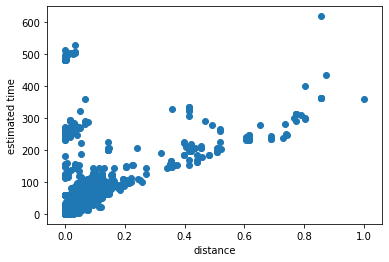

In [124]:
# print a chart of the estimated time in function of the distance
from matplotlib import pyplot as plt
plt.scatter(features['distance'], labels)
plt.xlabel("distance")
plt.ylabel("estimated time")
plt.show()

In [125]:
# exo: remove all the points which have estimated time > 400
# solution :
features = features[labels < 400]
labels  = labels[labels < 400]

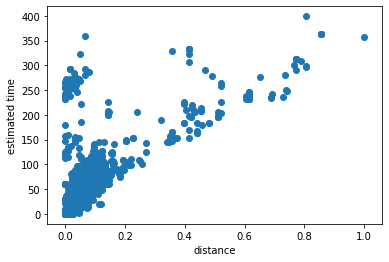

In [126]:
# exo: re-print the chart to confirm
# solution : 
from matplotlib import pyplot as plt
plt.scatter(features['distance'], labels)
plt.xlabel("distance")
plt.ylabel("estimated time")
plt.show()